<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-W203-Instructional-Team-" data-toc-modified-id="-W203-Instructional-Team--1"><span class="toc-item-num">1&nbsp;&nbsp;</span> W203 Instructional Team </a></span><ul class="toc-item"><li><span><a href="#1.-Class-Announcements" data-toc-modified-id="1.-Class-Announcements-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Class Announcements</a></span></li><li><span><a href="#2.-Homework-Review" data-toc-modified-id="2.-Homework-Review-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Homework Review</a></span></li><li><span><a href="#3.-Random-Variables-Discussion" data-toc-modified-id="3.-Random-Variables-Discussion-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Random Variables Discussion</a></span></li><li><span><a href="#-4-The-'Pyramid'-Distribution-" data-toc-modified-id="-4-The-'Pyramid'-Distribution--1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span> 4 The 'Pyramid' Distribution </a></span></li><li><span><a href="#-5-Exponential-Decay-" data-toc-modified-id="-5-Exponential-Decay--1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span> 5 Exponential Decay </a></span></li><li><span><a href="#-6-Modeling-an-American-Delicacy-" data-toc-modified-id="-6-Modeling-an-American-Delicacy--1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span> 6 Modeling an American Delicacy </a></span></li></ul></li></ul></div>

<h1>Unit 4 Part 2 Live Session: Continuous Random Variables </h1>
<h2> W203 Instructional Team </h2>

### 1. Class Announcements 
1. Check out our new front page! https://w203-spring-19.github.io/

(Thanks Eric Penner!)

### 2. Homework Review

### 3. Random Variables Discussion

 1. Suppose X is a random variable.  How is it possible that P(X = a) = 0 for every point a?  How can you relate this situation to the weight of a bowl full of water?
 
 >The connection is that a bowl of water has some positive weight.  But if we ask you how much the water directly above a specific point on the bottom of the bowl is, the answer is zero.

 2. Why do we need random variables?  Think about this picture:
![model](modeling.png)

World -> HHTTHHTHT… <- Bernoulli Random Variable (p)

We’ll have data on coin flips, which we model as coming from a series of Bernoulli trials with parameter $p$.  We then estimate the Bernoulli parameter.  Why do we need the random variable?  Why can’t we say something direct about the world?

> To be clear, we don't need the model for descriptive stats.  it is valid to say, "out of the previous 10 flips, 4 were heads.  But we need a model if we want to predict the next flip, for example.

> One good answer is that to predict the behavior of the coin in the real world, we'd need to know the position of every atom, and its velocity, and so forth...   We have no way to really study this.

> We might ask what kind of probability we're talking about.  Do we mean frequentist probability: if we duplicate the world exactly 100 times, with the same atoms moving in the same way, how many heads would we expect?  The answer might be 100 heads and 100 tails if the motion of the coin determines the result (absent quantum random effects...).  on the other hand, if we mean subjective probability (representing how much we believe the next flip will be a head) we need to  set up a prior distribution, which is also a type of model.

> Either way, it's impossible to say anything about the behavior of the world without modeling.

<h3> 4 The 'Pyramid' Distribution </h3>

Suppose a continuous random $X$ variable has the following PDF.



$$f_X(x)=\begin{cases} x, & 0 \leq x < 1 \\ 2 - x, & 1 \leq x < 2 \\ 0, & \text{otherwise} \end{cases}$$

### r-cheat sheet



In [5]:
# functions in R
f<- function(x){
   return(x+5) 
    }
f(1)

[1] 6

In [9]:
i=1
if (i==1) {print("i am 1")} else {print("No")}


[1] "i am 1"


**4.1** Plot the probability density function of X

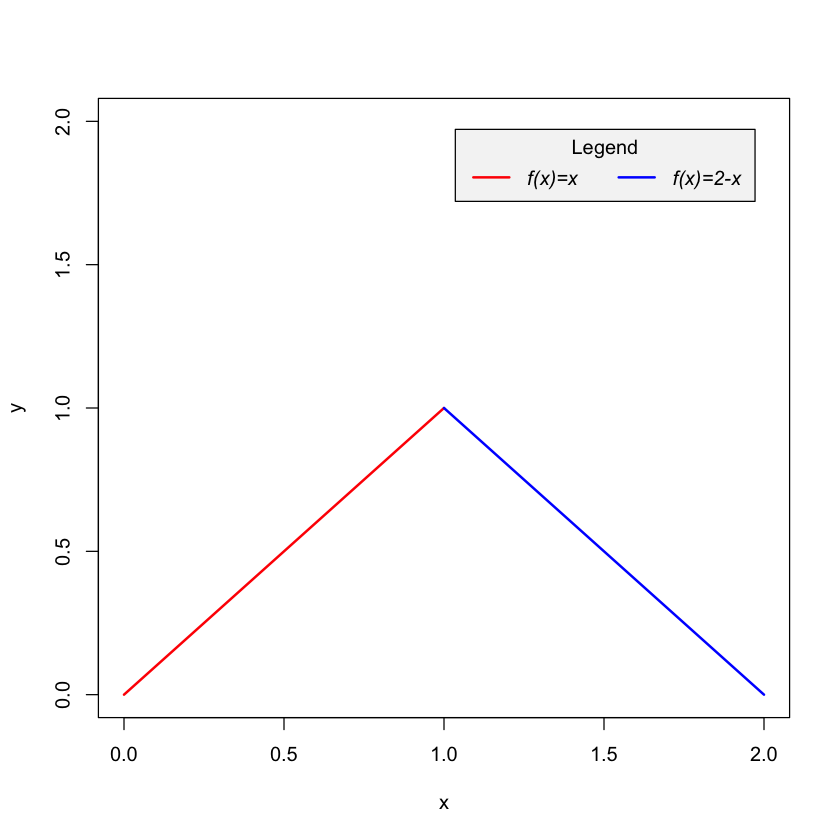

In [1]:
x1 <- seq(0,1,0.1)
x2 <- seq(1,2,0.1)
y1 <- x1
y2 <- 2-x2
plot(c(0,2), c(0,2), type="n", xlab="x", ylab="y")
lines(x1, y1, col="red", lwd=2)
lines(x2, y2, col="blue", lwd=2)
legend("topright",
       inset=.05,
       cex = 1,
       title="Legend",
       c("f(x)=x","f(x)=2-x"),
       horiz=TRUE,
       lty=c(1,1),
       lwd=c(2,2),
       col=c("red","blue"),
       bg="grey96",
       text.font=3)

 [1] -3.00 -2.75 -2.50 -2.25 -2.00 -1.75 -1.50 -1.25 -1.00 -0.75 -0.50 -0.25
[13]  0.00  0.25  0.50  0.75  1.00  1.25  1.50  1.75  2.00  2.25  2.50  2.75
[25]  3.00
 [1] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.25 0.50
[16] 0.75 1.00 0.75 0.50 0.25 0.00 0.00 0.00 0.00 0.00


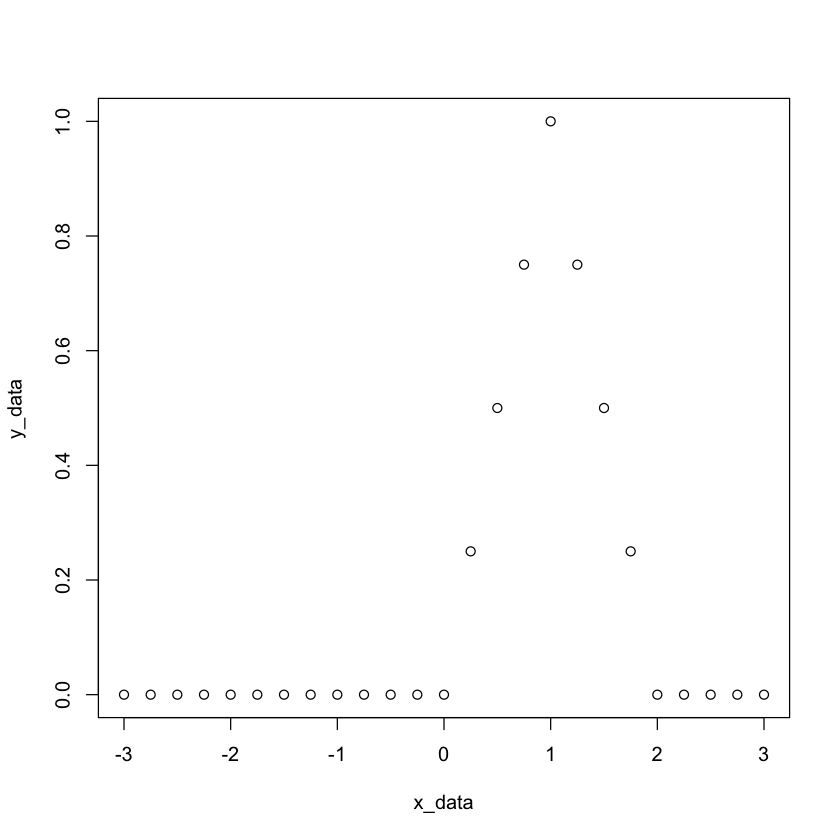

In [9]:
# we can write a function and apply it to a range.
Pyrm_Dist <- function(i) {
    if (0 <= i & i < 1) {x=i}
    else if (1 <= i & i <= 2) {x=2-i}
    else {x=0}
    return (x)
    }
# we can do this to get x data
#data=c(-10:10)

# lets try to get a given interval
x_data<- seq(from = -3, to = 3, by = .25)

y_data <-sapply(x_data, Pyrm_Dist)
print (x_data)
print (y_data)

plot(x_data,y_data)

**4.2** Find the cumulative distribution function of $X$ and plot it.

In [2]:
$$\text{for } x \in (0,1) F_X(x) = \int_{0}^{x}{f(x)}(u)du= x^2/2 $$

$$\text{For } x \in (1,2) F_X(x)dx = \int_{0}^{1}{f_x}(x)dx + \int_{1}^{x}f_x(u)du$$

$$F_X(x)dx = \int_{0}^{1} {f_x}(x)dx + \int_{1}^{x}f_x(u)du$$ 

$$F_X(x)dx = \int_{0}^{1} f_x(u)du + \int_{1}^{x}(2-u)du$$

**get the integral**
$$F_X(x)dx = \left[\frac {u^2}{2} \right]_0^1 + \left[2u-\frac {u^2}{2}\right]_x^1$$  

**Evaluate over the interval**
$$\left[\frac {1^2}{2} - \frac {0^2}{2} \right] + \left[-(2x-\frac {x^2}{2})-(2-\frac {1^2}{2})\right]$$

$$  \left[\frac {1}{2}\right]+ \left[(2x-\frac {1}{2}x^2)-1\frac{1}{2} \right]$$

**Simplify**

$$\text{For } x \in (1,2) F_X(x)dx $$
$$= 2x-\frac {1}{2}x^2-1$$

> $$F_X(x)=\begin{cases} 0, & x < 0 \\
\frac{x^2}{2}, & 0 \leq x < 1 \\
2x - \frac{1}{2}x^2 -1, & 1 \leq x < 2 \\
1, &  2 < x \end{cases}$$


ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '$'
1: $
    ^


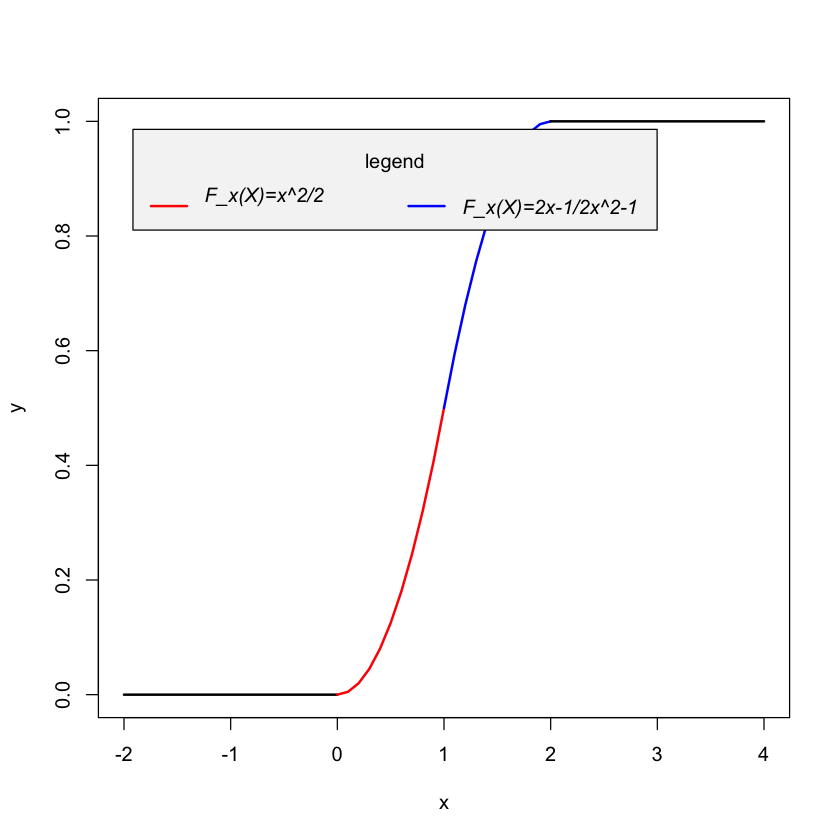

In [6]:
# plot it
x1 <- seq(-2,0,0.1)
x2 <- seq(0,1,0.1)
x3 <- seq(1,2,0.1)
x4 <- seq(2,4,0.1)
y1 <- rep(0, length(x1))
y2 <- x2^2/2
y3 <- 2*x3-.5*x3^2-1
y4 <- rep(1, length(x4))
plot(c(-2,4), c(0,1), type="n", xlab="x", ylab="y")
lines(x1, y1, col="black", lwd=2)
lines(x2, y2, col="red", lwd=2)
lines(x3, y3, col="blue", lwd=2)
lines(x4, y4, col="black", lwd=2)


legend("topleft",
      inset=.05,
      cex = 1, 
       title ="legend",
       c("F_x(X)=x^2/2\n", "F_x(X)=2x-1/2x^2-1"),
      horiz=TRUE,
      lty=c(1,1),  
      lwd=c(2,2),
      col=c("red","blue"),
      bg="grey96",
      text.font=3 
      )

**4.3** Compute the expectation of $X$.

**To get the expectation, evaluate the value over the two meaningful inetgrals times the values at those integrals**

$$E(F_X(x)) = \int_{0}^{1} f_x(u)du + \int_{1}^{2}(2-u)du$$

**get the integral**
$$F_X(x)dx = \left[\frac {u^2}{2} \right]_0^1 + \left[2u-\frac {u^2}{2}\right]_1^2$$  

**Evaluate over the interval**
$$\left[\frac {1^2}{2} - \frac {0^2}{2} \right] + \left[-(2x-\frac {x^2}{2})-(2-\frac {1^2}{2})\right]$$

$$  \left[\frac {1}{2}\right]+ \left[4-\frac {4}{2}-1\frac{1}{2} \right]$$

**Simplify**

$$ \frac {1}{2} + \frac{1}{2} = 1$$


<h3> 5 Exponential Decay </h3>

Suppose that the lifespan of a radioactive element is a random variable, $X$, with the following probability density function.

$$ f_X(x) = \begin{cases} ce^{-2x} , &x \geq 0
\\ 0, &x < 0 \end{cases}$$

where $c$ is some constant.

**5.1** Compute the constant $c$.

>$$
F_X(x) = \int_{0}^{\infty} ce^{-2x}dx = 1
$$
$$
F_X(x) = c \int_{0}^{\infty} e^{-2x}dx = c \left[-\frac{1}{2}e^{-2x}dx\right]_0^{\infty} = c \frac{1}{2} = 1
$$
$$ c = 2
$$

**5.2** Compute $P(X > 2)$.

> $$ 
P(X > 2) = \int_{2}^{\infty} 2e^{-2x}dx =  \left[-e^{-2x}dx\right]_2^{\infty} = e^{-4}
$$

<h3> 6 Modeling an American Delicacy </h3>

Suppose that the number of calories in a Twinkie is a normally-distributed random variable.Suppose further that 50% of Twinkies have over 100 calories, and 68.2% of Twinkies have calories in the interval from 85 calories to 115 calories. 

**6.1**  What fraction of Twinkies have more than 140 calories? 

> We know three things about the distribution of calories in Twinkies
1. The distribution is normal, and thus characterized by its mean and variance
2. The mean is is $100$
    1. Why? Because the median (50\% percentile) of the normal distribution is equal to its mean
3. The standard deviation is (approximately) $15$
    1. Why? Because about $68.2\%$ of the probability mass of the normal distribution lies one standard deviation away from the mean.
    2. This is known as the "68–95–99.7 rule":
        1. About $68\%$ of the distribution lies within one standard deviation from the mean
        2. About $95\%$ of the distribution lies within two standard deviations from the mean
        3. About $99.7\%$ of the distribution lies within three standard deviations from the mean

>If you don't remember the rule, you could also compute it using R.  The problem talks about a region with $68.2\%$ of the probability mass around the mean.  Subtracting this from $1$, we know that $1 - 68.2\%$ of the probability mass is in the left and right tails outside this interval.  Since the interval is symmetric about the mean, we just divide this by 2 to get the mass in the left tail.  Now, we can pass the result into R's qnorm function to find how many standard deviations away this point is.

In [1]:
qnorm(0.5*(1-.682))

[1] -0.9985763

>The result is approximately 1, as we expect.  Now, we can use pnorm to find out the fraction of Twinkies are over 140 calories.  Note that we have to subtract from 1 since pnorm gives us the probability to the left of a value, and we want the probability to the right.

In [2]:
mean = 100
std.dev = 15
print(paste0(
    "Share of Twinkies with more than 140 calories: ", 
    1 - pnorm(140, mean, std.dev)))

[1] "Share of Twinkies with more than 140 calories: 0.00383038056758978"


**6.2** Use R to simulate the production of 1000 Twinkies.  Plot the result and compute the fraction of Twinkies in your sample that have more than 140 calories.

[1] "Share of Twinkies with more than 140 calories: 0.001"


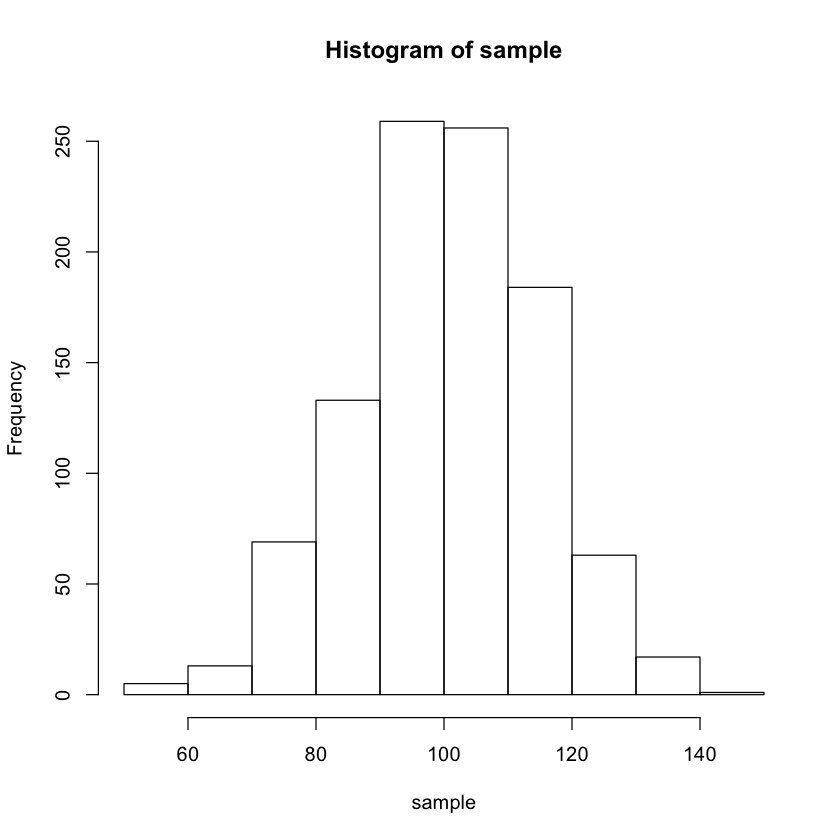

In [3]:
draws = 1000
sample = rnorm(draws, mean, std.dev)
hist(sample)
print(paste0(
    "Share of Twinkies with more than 140 calories: ",
    sum(sample>140)/draws))